# Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('UNR-IDD.csv')
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


# data info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

#  checking of null value

In [4]:
data.isnull().any().any()

False

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.corr()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
Received Packets,1.000000,0.235931,0.263276,0.585578,0.201716,NaN,NaN,NaN,NaN,0.178632,...,0.033358,0.020503,0.033358,0.020503,NaN,NaN,-0.032871,0.737932,0.737933,NaN
Received Bytes,0.235931,1.000000,0.678341,0.393544,0.753177,NaN,NaN,NaN,NaN,-0.042367,...,0.005309,0.021954,0.005309,0.021954,NaN,NaN,-0.033760,0.378620,0.378530,NaN
Sent Bytes,0.263276,0.678341,1.000000,0.492114,0.744272,NaN,NaN,NaN,NaN,-0.072000,...,0.030538,0.030343,0.030538,0.030343,NaN,NaN,-0.032480,0.452300,0.452223,NaN
Sent Packets,0.585578,0.393544,0.492114,1.000000,0.291104,NaN,NaN,NaN,NaN,0.034219,...,0.025320,0.021972,0.025320,0.021972,NaN,NaN,-0.038064,0.936095,0.936094,NaN
Port alive Duration (S),0.201716,0.753177,0.744272,0.291104,1.000000,NaN,NaN,NaN,NaN,-0.124533,...,-0.024441,0.003296,-0.024441,0.003296,NaN,NaN,-0.031836,0.287166,0.287050,NaN
Packets Rx Dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packets Tx Dropped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packets Rx Errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packets Tx Errors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta Received Packets,0.178632,-0.042367,-0.072000,0.034219,-0.124533,NaN,NaN,NaN,NaN,1.000000,...,-0.022130,-0.014579,-0.022130,-0.014579,NaN,NaN,-0.017069,0.044765,0.044780,NaN


# Exploratory data analysis

<AxesSubplot:>

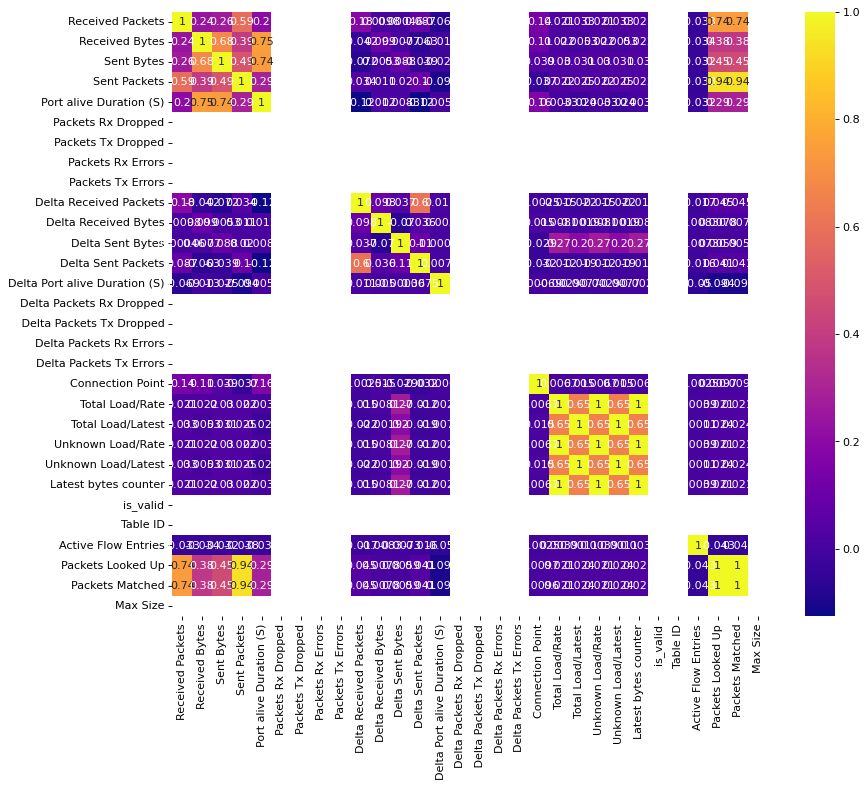

In [7]:
figure(figsize=(12, 10), dpi=80)
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'plasma')

<AxesSubplot:>

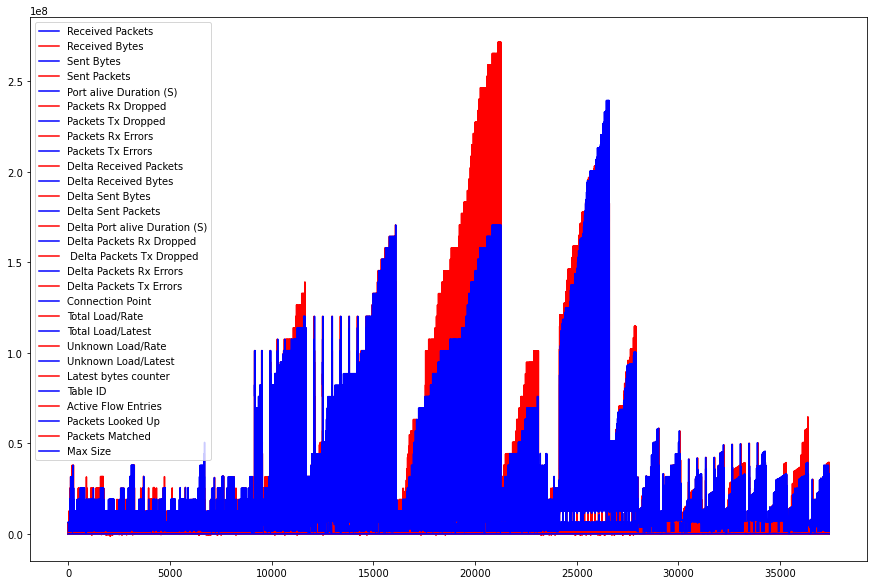

In [8]:
data.plot(figsize=(15,10),color=['blue','red'])

# CONVERTING STRING TO INT

In [9]:
data['is_valid'] = data['is_valid'].astype("category").cat.codes
data['Label'] = data['Label'].astype("category").cat.codes
data['Binary Label'] = data['Binary Label'].astype("category").cat.codes

In [10]:
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,0
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,0
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,0
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,0
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,0,0,7,489,403,-1,5,0


# dropping columns

In [11]:
data=data.drop("Switch ID", axis=1)

In [12]:
data=data.drop("Port Number", axis=1)

In [13]:
data.head()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,132,9181,6311853,238,46,0,0,0,0,0,...,0,0,0,0,9,767,688,-1,5,0
1,187,6304498,15713,171,46,0,0,0,0,146,...,0,0,0,0,9,767,688,-1,5,0
2,235,6311567,8030,58,46,0,0,0,0,2,...,0,0,0,0,9,767,688,-1,5,0
3,59,7878,16439,182,46,0,0,0,0,2,...,0,0,0,0,9,767,688,-1,5,0
4,188,6304547,16497,183,46,0,0,0,0,0,...,0,0,0,0,7,489,403,-1,5,0


# X AND Y VALUES Classification

In [14]:
x=data.drop("Binary Label", axis=1)

In [15]:
y=data["Binary Label"]

In [16]:
x

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,132,9181,6311853,238,46,0,0,0,0,0,...,0,0,0,0,0,9,767,688,-1,5
1,187,6304498,15713,171,46,0,0,0,0,146,...,0,0,0,0,0,9,767,688,-1,5
2,235,6311567,8030,58,46,0,0,0,0,2,...,0,0,0,0,0,9,767,688,-1,5
3,59,7878,16439,182,46,0,0,0,0,2,...,0,0,0,0,0,9,767,688,-1,5
4,188,6304547,16497,183,46,0,0,0,0,0,...,0,0,0,0,0,7,489,403,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37406,228,30195,7857046,145141,276,0,0,0,0,4,...,0,0,0,0,0,6,147563,147454,-1,4
37407,1064,18962056,37732,338,276,0,0,0,0,4,...,0,0,0,0,0,6,147563,147454,-1,4
37408,1042,25252012,7856976,145140,276,0,0,0,0,4,...,0,0,0,0,0,8,295511,295404,-1,4
37409,149012,14360115,29509,211,276,0,0,0,0,5381,...,0,0,0,0,0,8,295511,295404,-1,4


In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
37406    0
37407    0
37408    0
37409    0
37410    0
Name: Binary Label, Length: 37411, dtype: int8

# DATA SPLITTING 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [19]:
x_train

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,Delta Received Packets,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
31877,101183,11776780,23094,169,206,0,0,0,0,6,...,0,0,0,0,0,5,101682,101583,-1,4
1539,862,18941308,120009,1991,126,0,0,0,0,2,...,469,88452,469,0,0,8,5334,5231,-1,5
23911,978,12845162,12741545,967,246,0,0,0,0,4,...,0,0,0,0,0,8,4666,4560,-1,3
5441,2929,167370,6463678,3000,96,0,0,0,0,196,...,1063,140778,1063,0,0,8,6284,6189,-1,5
4593,133,18090,18048,132,151,0,0,0,0,2,...,0,0,0,0,0,7,3853,3752,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1507,6385774,24962,240,141,0,0,0,0,100,...,0,0,0,0,0,5,1973,1869,-1,5
32511,741,18932580,38474,453,116,0,0,0,0,63,...,0,0,0,0,0,8,108685,108595,-1,4
5192,317,6322163,18394,131,156,0,0,0,0,6,...,0,0,0,0,0,4,1021,910,-1,5
12172,881,5341671,25333296,1880,836,0,0,0,0,142,...,0,0,0,0,0,507,4341,4215,-1,0


In [20]:
y_train

31877    0
1539     0
23911    0
5441     0
4593     0
        ..
7813     0
32511    0
5192     0
12172    0
33003    0
Name: Binary Label, Length: 29928, dtype: int8

# Random Forest Classifier

In [21]:
Random =RandomForestClassifier(n_estimators=100)

In [22]:
Random.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
Random_pred=Random.predict(x_test)

In [24]:
Random_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [25]:
accuracy_score(y_test,Random_pred)

1.0

In [26]:
print(classification_report(y_test, Random_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6747
           1       1.00      1.00      1.00       736

    accuracy                           1.00      7483
   macro avg       1.00      1.00      1.00      7483
weighted avg       1.00      1.00      1.00      7483



In [27]:
confusion_matrix(y_test, Random_pred)

array([[6747,    0],
       [   0,  736]], dtype=int64)

# KNeighbors Classifier

In [28]:
KNeighbor= KNeighborsClassifier(n_neighbors=7)

In [29]:
KNeighbor.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
KNeighbor_pred = (KNeighbor.predict(x_test))

In [31]:
KNeighbor_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [32]:
print(KNeighbor.score(x_test,KNeighbor_pred))

1.0


In [33]:
print(classification_report(y_test, KNeighbor_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6747
           1       0.87      0.79      0.83       736

    accuracy                           0.97      7483
   macro avg       0.93      0.89      0.91      7483
weighted avg       0.97      0.97      0.97      7483



In [34]:
confusion_matrix(y_test, KNeighbor_pred)

array([[6663,   84],
       [ 153,  583]], dtype=int64)

# SUPPORT VECTOR MACHINE

In [35]:
svm = SVC(kernel='linear', random_state=0)  
svm.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [36]:
svm_pred= svm.predict(x_test)  

In [37]:
svm_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [38]:
accuracy_score(y_test,svm_pred)

1.0

In [39]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6747
           1       1.00      1.00      1.00       736

    accuracy                           1.00      7483
   macro avg       1.00      1.00      1.00      7483
weighted avg       1.00      1.00      1.00      7483



In [40]:
confusion_matrix(y_test, svm_pred)

array([[6747,    0],
       [   0,  736]], dtype=int64)